# Introduction to databases

## How do you keep track of your data and "metadata"?

* What is saving?
* What about saving raw binary/csv/json/... files in various directories on your local computer? Or on the server that I think we have in the lab?
* Should I save my analysis somehow?
* Can I efficiently search my data?
* Can I combine my lab notebook with the raw files that I collect, plus maybe my analysis and modeling work?
* Can I somehow select parts of the data and just do analysis on that?
* Can I get a combined version of different types of data (e.g. my physiological and behavioral recordings)?
* As long as I can produce nice figures in the end and write a paper who cares how my data is organized? Only I need to understand what is going on.



## Why use a database and not spreadsheets or arbitrary files in folders as data repositories?

![alt text](https://imgs.xkcd.com/comics/spreadsheets.png)

* quick and easy to find information - data can be searched easily -> querying!
* Defined relationships between tables that store data. This allows you to join information across different modalities.
* Can be scaled up easily - It is easy to host databases on servers and allow multiple users to access the database
* Databases are concurrent; multiple users can use them at the same time without corrupting the data.
* Data integrity will likely be better than storing files directly. Your data has a built-in structure.
* The same information can only be stored once, avoiding duplicate entries.
* You can access certain parts of the data without having to load all data beforehand -> again querying!
* Databases can handle large data sets

## Main types of databases

* SQL/RDBMS/Relational databases
    * MySQL
    * PostgreSQL
* NoSQL/Non-relational databases
    * MongoDB
    * Redis
    
Before we dive into SQL databases let me quickly introduce the concept of a data pipeline.

## What is a data pipeline?

![alt text](https://imgs.xkcd.com/comics/data_pipeline.png)

A data pipeline may include all the features of a database system plus some added functionality:

* Integrating computation to perform analyses and manage intermediate results in a principled way
* supporting distributed computations without conflict
* Defining, communicating, and enforcing **workflow**, making clear the sequence of steps that must be performed for data entry, acquisition, and processing.

Now back to SQL databases!

## SQL database

Sql databases are comprised of schema (or sometimes called database; the terminology can be confusing) that contain a set of tables that can relate to one another or to other tables in another schema. These links between tables can be represented via an entity relational diagram:

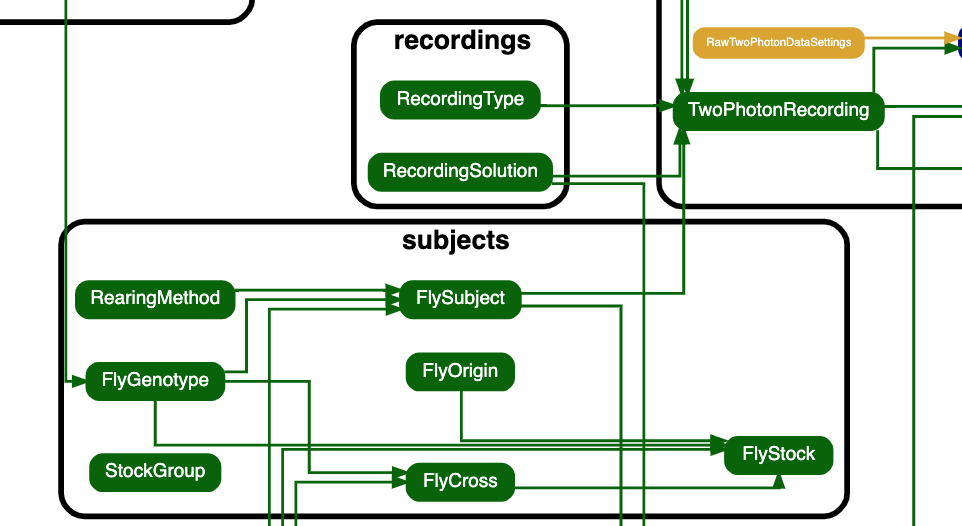

In [16]:
from IPython.display import Image
Image(filename='static/erd_example.png')

You can think of each table similar to a pandas DataFrame or a spreadsheet. It has columns (aka attributes) and rows (aka entries, entities).

Each column has a defined data type (e.g. float, integer, characters). That is new entries into the database need to abide by the correct data type for each column.

As mentioned previously, databases do not allow "duplicates". What does this mean? Do I have to use unique values for every new entry across all columns? 

No! 

You will define the set of columns that need to be unique. These columns are called the **primary keys**. In some sense, primary keys work similarly to the index in a pandas DataFrame. 

The columns that are not primary keys are sometimes called dependent attributes.

For example in the table below we could define the `index` and `level_0` column as the primary key columns. This form of table could exist in a SQL database as each row/entry has unique primary key columns (even though the columns `a` `b`, and `c` have the same values across rows).

In [11]:
import pandas as pd
import numpy as np

data = pd.DataFrame(
    np.ones((10, 3)), columns=['a', 'b', 'c']
).reset_index().reset_index()
print(data)

   level_0  index    a    b    c
0        0      0  1.0  1.0  1.0
1        1      1  1.0  1.0  1.0
2        2      2  1.0  1.0  1.0
3        3      3  1.0  1.0  1.0
4        4      4  1.0  1.0  1.0
5        5      5  1.0  1.0  1.0
6        6      6  1.0  1.0  1.0
7        7      7  1.0  1.0  1.0
8        8      8  1.0  1.0  1.0
9        9      9  1.0  1.0  1.0


This type of table could not exist in a SQL database, if index is our primary key column because each entry has the same value for the primary key column (i.e. "neuroscience").

In [10]:
data = pd.DataFrame(
    np.ones((10, 3)), columns=['a', 'b', 'c']
)
data['index'] = 'neuroscience'
print(data)

     a    b    c         index
0  1.0  1.0  1.0  neuroscience
1  1.0  1.0  1.0  neuroscience
2  1.0  1.0  1.0  neuroscience
3  1.0  1.0  1.0  neuroscience
4  1.0  1.0  1.0  neuroscience
5  1.0  1.0  1.0  neuroscience
6  1.0  1.0  1.0  neuroscience
7  1.0  1.0  1.0  neuroscience
8  1.0  1.0  1.0  neuroscience
9  1.0  1.0  1.0  neuroscience


In some sense you can think of primary key columns as "metadata" that defines the actual data in your table. 

NB: the use of the word "metadata" in neuroscience versus data science differs significantly. In data science for example, "metadata" often refers to things like the data sizes, timestamps, and data types.

### How are relations defined between tables in a SQL database?

In a SQL database tables can depend on other tables. **Foreign keys** define a dependencies between tables. Dependencies provide entries in one table with access to data in another table and establish certain constraints on entries containing a foreign key.
These foreign "parent" tables are referenced in "child" tables via the primary key. 

We will go into more detail of the different ways to establish relations between tables in the next lectures, but for now I will introduce a simple example.

Let's say you have a table called `Neuron` (here the primary key column could be `neuron_id`):

neuron_id | response | stimulus_name
--- | --- | ---
1 | 120 | flash
2 | 121 | sine_wave
3 | 111 | sine_wave

and another table called `Stimulus` (here the primary key column is `stimulus_name`):

stimulus_name | duration | repeats
--- | --- | ---
flash | 1 | 3
sine_wave | 11 | 1

For the `Neuron` table, we may want to constrain the `stimulus_name` column to correspond to entries that exist in the `Stimulus` table. This is what it means to build a relation between tables. 

There are differen types of dependencies/relationships between tables: one-to-one, one-to-many, many-to-many:
https://vladmihalcea.com/database-table-relationships/

We will explain these in more detail in the next lectures.

## Pros and Cons of SQL

Pros:
* well-documented mature technologies
* SQL standards are well-defined
* SQL databases are ACID-compliant (atomicity, consistency, isolation, durability) - https://database.guide/what-is-acid-in-databases/
* They scale well vertically
* more: https://www.guru99.com/sql-vs-nosql.html

Cons:
* Don't work very well with unstructured or semi-structured data
* Do not scale horizontally
* more: https://www.guru99.com/sql-vs-nosql.html

## Where is my data?

All your data is stored in the database, and can be made available to anyone who has access to the database. Your database can be hosted on your local computer or on a server.

There are easy ways to backup your data using just a single command on the terminal. Here are some options (I recommend using mysqldump): https://www.jotform.com/blog/how-to-backup-mysql-database/

## What is an ORM and why use it?

Do you want to learn a whole new language to be able to interact with a SQL database?

Object-relational mappers (ORMs) provide a high-level abstraction upon a relational database that allows a programmer to write Python code instead of SQL to create, read, update and delete data and schemas in their database. 

Thus, you can stay in Python and use the power of SQL databases.

## We will be using the DataJoint ORM

The documentation for datajoint can be found here: https://docs.datajoint.io/python/index.html

Pros:
* Build for scientists by scientists
* Integrates data analysis pipeline concepts into ORM design
* Integrate a MySQL database and bulk data storage
* It is easy to build a database quickly with a few lines of code - i.e. an easy-to-use ORM
* Many neuroscience examples on the GitHub

Cons:
* the project is less developed than other ORMs (e.g. SQLAlchemy, peewee)
* Some features of more advanced ORMs are currently missing
* Documentation is sometimes lacking for particular features and the community is not very large (However, it has a relatively large neuroscience community)

### Example of DataJoint ORM

This is only an example to give you an idea of what it means to code up your SQL tables using the DataJoint ORM.

```python
# importing the datajoint module
import datajoint as dj

# defining the datajoint schema decorator
schema = dj.schema('tutorial') # the schema is called tutorial

# this defines the table
@schema # a datajoint-specific decorator
class Person(dj.Manual):
    # this is the definition of the table.
    # It specifies the name of each column and its datatype
    # the --- delineates primary keys from dependent columns
    definition = """
    username : varchar(20)   # unique user name
    ---
    first_name : varchar(30)
    last_name  : varchar(30)
    """
```

## Main DataJoint features

* Integrates the concepts of a data pipeline with a SQL database structure
* Python ORM to interact with MySQL database. There is also a Matlab ORM, but it is not as well maintained and lacks many features the Python ORM has.
* Data integrity: identification, dependencies, groupings
* Simple querying of data
* Automated distributed computation

# What will the next lectures be about?

1. Basic functionalities of datajoint
2. Advanced datajoint tools (unique to 
3. Managing your database and running a simple web app for easy remote querying of data and manual entry

# Installation

Instructions for installing MySQL and initializing your database will be provided with the homework. I will host a little troubleshooting session on Monday afternoon for people having trouble installing everything.

![alt-text](http://www.phdcomics.com/comics/archive/phd072613s.gif)